# Quick and Safe

In [1]:
from settings.environment import Environment
from roadmap.visibility_roadmap import VisibilityRoadmap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from shapely.geometry import Point
from settings.threat import Threat
from roadmap.prm import PRM
from roadmap.grid import Grid

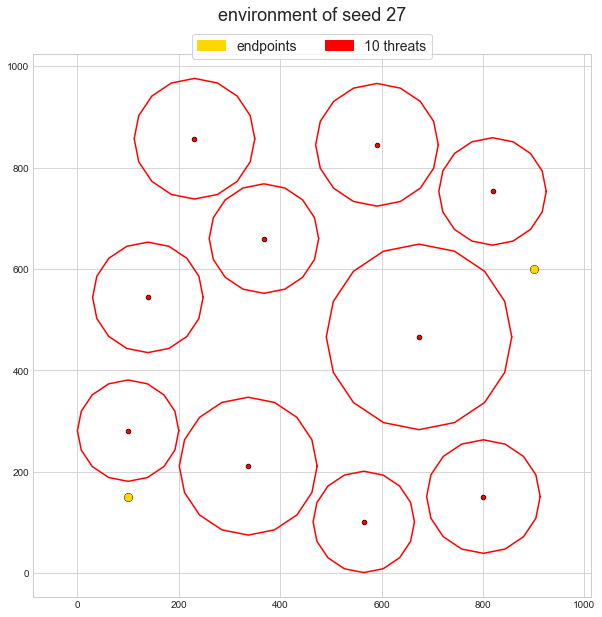

In [2]:
env = Environment(source=Point(100,150), target=Point(900,600), num_threats=10, seed_value=27)
env.plot()
plt.title(f'environment of seed {env._seed_value}', fontsize=18, y=1.05)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True)

plt.savefig(f'../plots/environment_of_seed_{env._seed_value}.png')
plt.show()

In [3]:
rm = VisibilityRoadmap(env)
shortest_path, shortest_length, shortest_risk, shortest_time = rm.shortest_path(weight='length')
safest_path, safest_length, safest_risk, safest_time = rm.shortest_path(weight='risk')

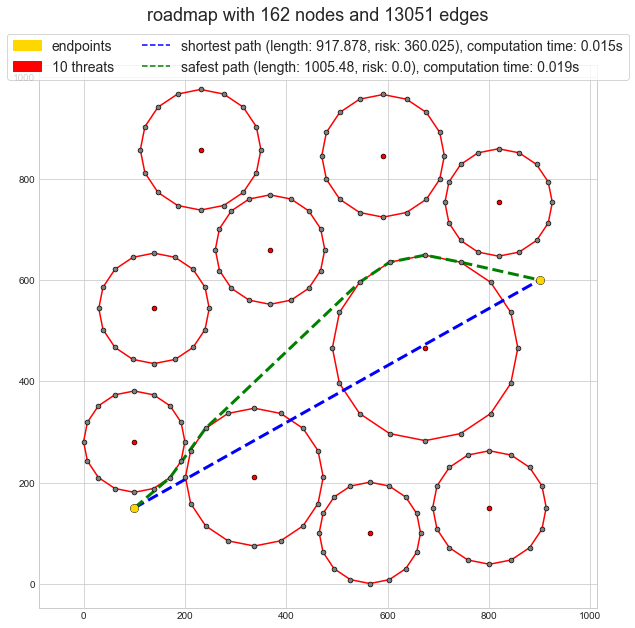

In [4]:
rm.plot(display_edges=False)
plt.plot([p[0] for p in shortest_path], [p[1] for p in shortest_path], color='blue', linestyle='dashed', linewidth=3)
plt.plot([p[0] for p in safest_path], [p[1] for p in safest_path], color='green', linestyle='dashed', linewidth=3)

plt.title(f'roadmap with {len(rm._graph.nodes)} nodes and {len(rm._graph.edges)} edges', fontsize=18, y=1.07)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats'),
                    Line2D([0], [0], color='blue', linestyle='dashed', label=f'shortest path (length: {shortest_length}, risk: {shortest_risk}), computation time: {shortest_time}s'),
                    Line2D([0], [0], color='green', linestyle='dashed', label=f'safest path (length: {safest_length}, risk: {safest_risk}), computation time: {safest_time}s')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2, fancybox=True)

plt.savefig('../plots/shortest_and_safest_path_examples.png')
plt.show()

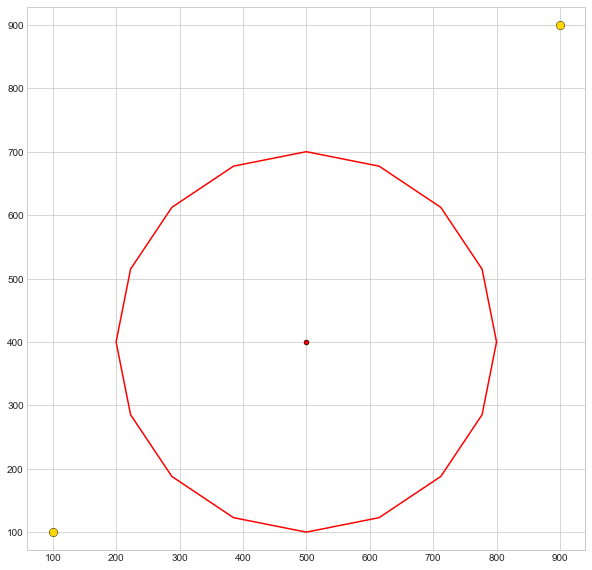

In [2]:
env = Environment(source=Point(100,100), target=Point(900,900), num_threats=1, seed_value=27)
env._threats = [Threat(center=Point(500,400), radius=300)]
env.plot()

In [3]:
prm = PRM(env)
building_time = prm.add_samples(1000)

 29%|██▉       | 288/1000 [00:05<00:13, 54.06it/s]


KeyboardInterrupt: 

In [5]:
grid = Grid(env)
prm = grid

In [6]:
visibility = VisibilityRoadmap(env)

In [7]:
prm.merge_graph(grid.graph, merge_radius=10)

In [8]:
prm.merge_graph(visibility.graph, merge_radius=10)

In [6]:
constrained_path_300, constrained_length_300, constrained_risk_300, constrained_time_300 = prm.constrained_shortest_path(weight='length', constraint='risk', budget=200)

NameError: name 'building_time' is not defined

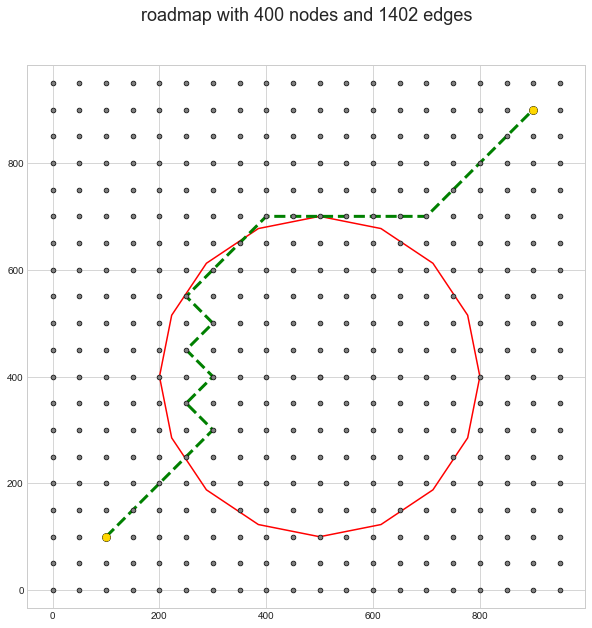

In [7]:
prm.plot(display_edges=False)
plt.plot([p[0] for p in constrained_path_300], [p[1] for p in constrained_path_300], color='green', linestyle='dashed', linewidth=3)

plt.title(f'roadmap with {len(prm._graph.nodes)} nodes and {len(prm._graph.edges)} edges', fontsize=18, y=1.07)
plt.legend(handles=[Patch(color='gold', label='endpoints'),
                    Patch(color='red', label=f'{len(env.threats)} threats'),
                    Line2D([0], [0], color='blue', linestyle='dashed', label=f'constrained path (length: {constrained_length_300}, risk: {constrained_risk_300}, computation time: {constrained_time_300 + 0}s)')],
           fontsize=14, frameon=True, loc='upper center', bbox_to_anchor=(0.5, 1.07), ncol=2, fancybox=True)

plt.savefig('../plots/constrained_path_examples.png')
plt.show()

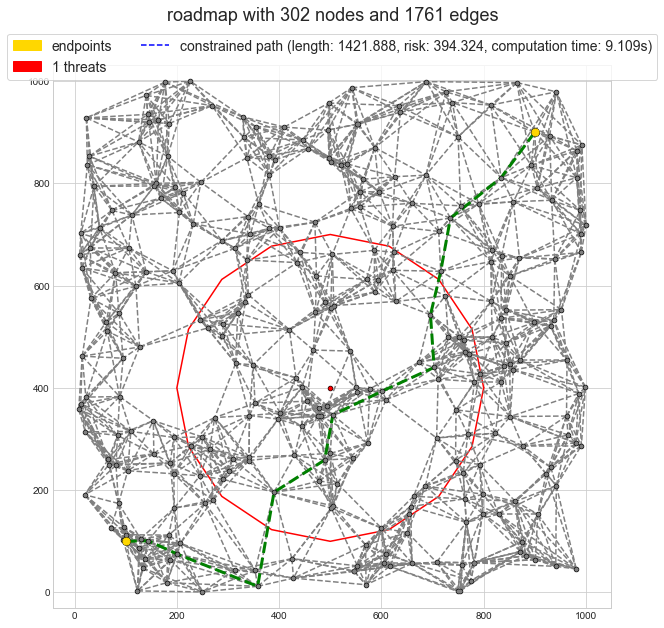